...evaluating matrix... (0,0)
numerical integration of sin(x)*tanh(20*x - 20*pi)
A:
 [3.14159265358979] 
b:
 [mpf('-3.9978630074249364')]
coeff: [mpf('-1.2725593188718187')]
approximation: -1.27255931887182*sin(x)
f: tanh(20*x - 20*pi)
u: -1.27255931887182*sin(x)
...evaluating matrix... (0,0)
numerical integration of sin(3*x)*tanh(20*x - 20*pi)
A:
 [3.14159265358979] 
b:
 [mpf('-1.3269556045860169')]
coeff: [mpf('-0.42238308746671821')]
approximation: -0.422383087466718*sin(3*x)
f: tanh(20*x - 20*pi)
u: -1.27255931887182*sin(x) - 0.422383087466718*sin(3*x)
...evaluating matrix... (0,0)
numerical integration of sin(5*x)*tanh(20*x - 20*pi)
A:
 [3.14159265358979] 
b:
 [mpf('-0.78947942392209103')]
coeff: [mpf('-0.25129910557308544')]
approximation: -0.251299105573085*sin(5*x)
f: tanh(20*x - 20*pi)
u: -1.27255931887182*sin(x) - 0.422383087466718*sin(3*x) - 0.251299105573085*sin(5*x)
...evaluating matrix... (0,0)
numerical integration of sin(7*x)*tanh(20*x - 20*pi)
A:
 [3.14159265358979] 
b

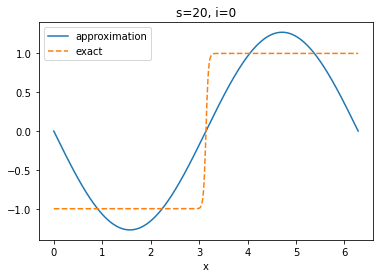

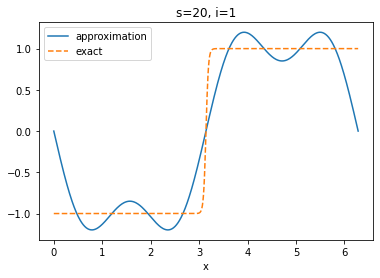

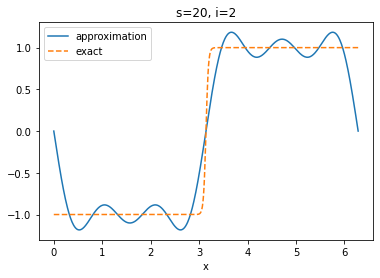

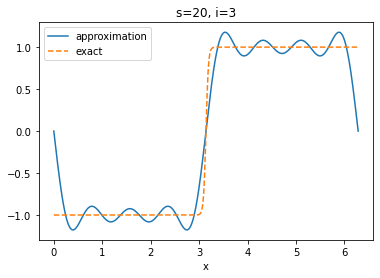

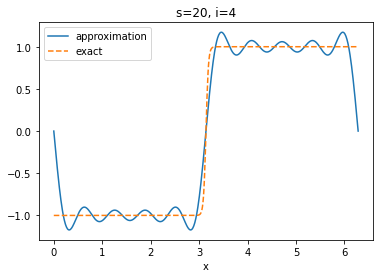

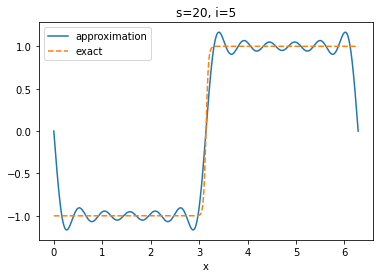

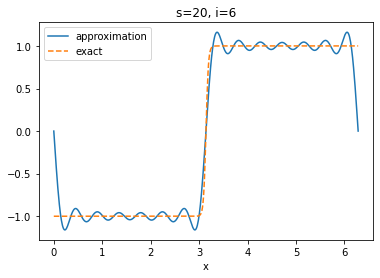

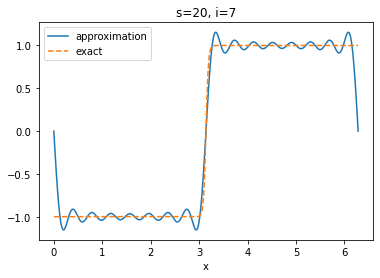

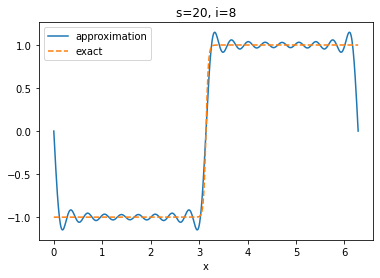

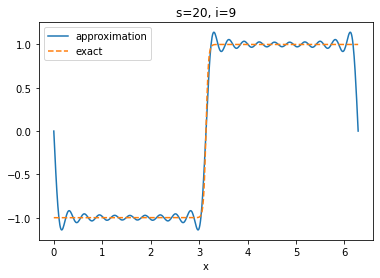

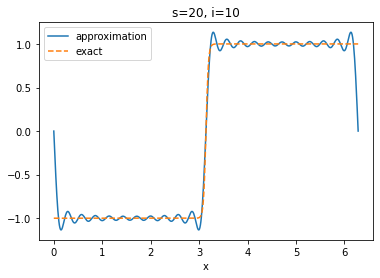

In [1]:
import sys, os
sys.path.insert(0, os.path.join(os.pardir, 'src'))
import sympy as sym
from approx1D import least_squares_orth, comparison_plot
import matplotlib.pyplot as plt

x = sym.Symbol('x')

# Naive approach: (not utilizing the fact that i+1 computations can
# make use of i computations)
def naive(f, s, Omega, N=10):
    psi = []
    for i in range(N+1):
        psi.append(sym.sin((2*i+1)*x))
        u, c = least_squares_orth(f, psi, Omega, symbolic=False)
        comparison_plot(f, u, Omega, 'tmp_sin%02dx' % i,
                        legend_loc='upper left', show=True)

# Efficient approach: compute just the matrix diagonal
def efficient(f, s, Omega, N=10):
    u = 0
    for i in range(N+1):
        psi = [sym.sin((2*i+1)*x)]
        next_term, c = least_squares_orth(f, psi, Omega, False)
        u = u + next_term
        comparison_plot(f, u, Omega, 'tmp_sin%02dx' % i,
                        legend_loc='upper left', show=False,
                        plot_title='s=%g, i=%d' % (s, i))

if __name__ == '__main__':
    s = 20  # steepness
    f = sym.tanh(s*(x-sym.pi))
    from math import pi
    Omega = [0, 2*pi]  # sym.pi did not work here
    efficient(f, s, Omega, N=10)
    # Make movie
    # avconv/ffmpeg skips frames, use convert instead (few files)
    cmd = 'convert -delay 200 tmp_sin*.png tanh_sines_approx.gif'
    os.system(cmd)
    # Make static plots, 3 figures on 2 lines
    for ext in 'pdf', 'png':
        cmd = 'doconce combine_images %s -3 ' % ext
        cmd += 'tmp_sin00x tmp_sin01x tmp_sin02x tmp_sin04x '
        cmd += 'tmp_sin07x tmp_sin10x tanh_sines_approx'
        os.system(cmd)
    plt.show()
